## Importing things

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, string
import json
from collections import Counter
import time
import os
import ast
import datetime as dt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
# Code copied from https://www.kaggle.com/vksbhandary/exploring-yelp-reviews-dataset
def init_ds(json):
    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file) as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)

## Pittsburgh

In [3]:
pittsburgh = read_json('pittsburgh_sample.json')

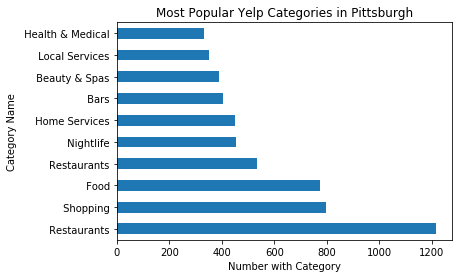

In [4]:
# Categories in Pittsburgh
categories_pgh = {}
for array in pittsburgh.categories.values:
    cat_array = array.split(',')
    for x in cat_array:
        try :
            categories_pgh[x] = categories_pgh[x] + 1
        except:
            categories_pgh[x] = 1
            
categories = dict(Counter(categories_pgh).most_common(10))
df = pd.DataFrame({'lab': list(categories.keys()), 'val': list(categories.values())})
#print(df)
ax = df.plot.barh(x='lab', y='val')
ax.get_legend().remove()
plt.xlabel('Number with Category')
plt.ylabel('Category Name')
plt.title('Most Popular Yelp Categories in Pittsburgh')
plt.show()

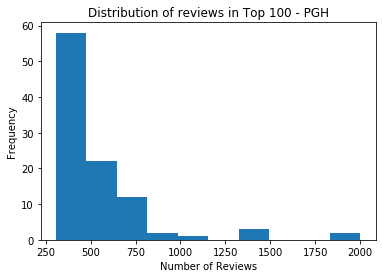

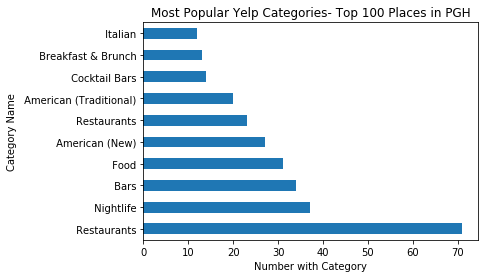

In [5]:
# Find the most reviewed places in PGH 
# What categories are they? What is their distribution of stars like?
top_100_pgh = pittsburgh.sort_values(by = 'review_count', ascending = False)[:100]

# Distribution of reviews in top 100
plt.hist(top_100_pgh['review_count'])
plt.title('Distribution of reviews in Top 100 - PGH')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# What categories?
categories_pgh_100 = {}
for array in top_100_pgh.categories.values:
    cat_array = array.split(',')
    for x in cat_array:
        try :
            categories_pgh_100[x] = categories_pgh_100[x] + 1
        except:
            categories_pgh_100[x] = 1
            
categories = dict(Counter(categories_pgh_100).most_common(10))
df = pd.DataFrame({'lab': list(categories.keys()), 'val': list(categories.values())})
#print(df)
ax = df.plot.barh(x='lab', y='val')
ax.get_legend().remove()
plt.xlabel('Number with Category')
plt.ylabel('Category Name')
plt.title('Most Popular Yelp Categories- Top 100 Places in PGH')
plt.show()

In [6]:
top_100_pgh.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3507,JLbgvGM4FXh9zNP4O5ZWjQ,Meat & Potatoes,649 Penn Ave,Pittsburgh,PA,15222,40.443145,-80.001104,4.0,2001,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Specialty Food, Meat Shops, Steakhouses, Food,...","{'Monday': '17:0-23:0', 'Tuesday': '17:0-22:0'..."
2175,u4sTiCzVeIHZY8OlaL346Q,Gaucho Parrilla Argentina,1601 Penn Ave,Pittsburgh,PA,15222,40.449043,-79.987573,4.5,1949,1,"{'WiFi': 'u'no'', 'RestaurantsDelivery': 'Fals...","Seafood, Latin American, Argentine, Restaurant...","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
478,woXlprCuowrLJswWere3TQ,täkō,214 6th St,Pittsburgh,PA,15222,40.442229,-80.001985,4.5,1466,1,"{'BusinessAcceptsCreditCards': 'True', 'DogsAl...","American (New), Mexican, Restaurants","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
953,lKom12WnYEjH5FFemK3M1Q,Primanti Bros,46 18th St,Pittsburgh,PA,15222,40.450706,-79.985588,3.5,1380,1,"{'Corkage': 'False', 'RestaurantsReservations'...","Sandwiches, Restaurants, Botanical Gardens, Ar...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1650,dLc1d1zwd1Teu2QED5TmlA,Noodlehead,242 S Highland Ave,Pittsburgh,PA,15206,40.457748,-79.925494,4.5,1341,1,"{'WiFi': 'u'no'', 'NoiseLevel': 'u'average'', ...","Thai, Noodles, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ..."


In [7]:
# In PGH, which kinds of stores are the ones getting 1-star reviews? 5-star reviews? 
# Same with LV

## Las Vegas

In [8]:
las_vegas = read_json('las_vegas_sample.json')

In [9]:
las_vegas.city.value_counts()

Las Vegas    25010
Name: city, dtype: int64

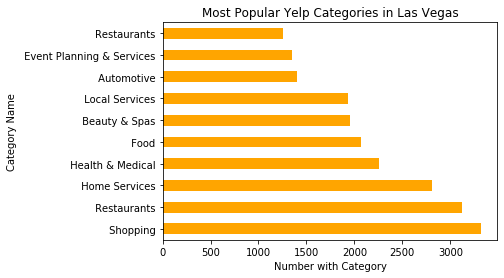

In [186]:
# Categories in Las Vegas
categories_lv = {}
for array in las_vegas.categories.values:
    cat_array = array.split(',')
    for x in cat_array:
        try :
            categories_lv[x] = categories_lv[x] + 1
        except:
            categories_lv[x] = 1
            
categories = dict(Counter(categories_lv).most_common(10))
df = pd.DataFrame({'lab': list(categories.keys()), 'val': list(categories.values())})
#print(df)
ax = df.plot.barh(x='lab', y='val', color = 'orange')
ax.get_legend().remove()
plt.xlabel('Number with Category')
plt.ylabel('Category Name')
plt.title('Most Popular Yelp Categories in Las Vegas')
plt.show()

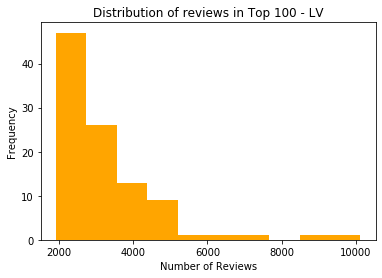

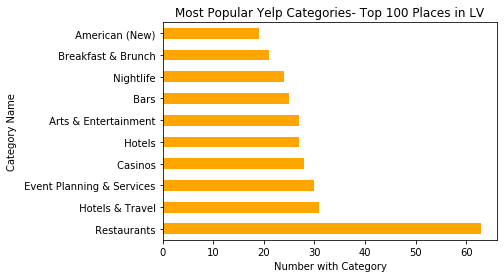

In [11]:
# Find the most reviewed places in LV
# What categories are they? What is their distribution of stars like? 
top_100_lv = las_vegas.sort_values(by = 'review_count', ascending = False)[:100]

# What are the distributions of reviews?
plt.hist(top_100_lv['review_count'], color = 'orange')
plt.title('Distribution of reviews in Top 100 - LV')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# What categories?
categories_lv_100 = {}
for array in top_100_lv.categories.values:
    cat_array = array.split(',')
    for x in cat_array:
        try :
            categories_lv_100[x] = categories_lv_100[x] + 1
        except:
            categories_lv_100[x] = 1
            
categories = dict(Counter(categories_lv_100).most_common(10))
df = pd.DataFrame({'lab': list(categories.keys()), 'val': list(categories.values())})
#print(df)
ax = df.plot.barh(x='lab', y='val', color = 'orange') # This is a bit off color?
ax.get_legend().remove()
plt.xlabel('Number with Category')
plt.ylabel('Category Name')
plt.title('Most Popular Yelp Categories- Top 100 Places in LV')
plt.show()

In [12]:
top_100_lv.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
9734,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.115929,-115.176238,4.0,10129,1,"{'BikeParking': 'False', 'OutdoorSeating': 'Fa...","Sandwiches, Breakfast & Brunch, Food, Restaura...","{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'..."
14098,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,3655 Las Vegas Blvd S,Las Vegas,NV,89109,36.112859,-115.172434,4.0,9264,1,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","Restaurants, French, Steakhouses, Food, Breakf...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
17582,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,"The Cosmopolitan Of Las Vegas, Level 2, The Ch...",Las Vegas,NV,89109,36.109550,-115.176155,3.5,7383,1,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Buffets, Breakfast & Brunch, Restaurants","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."
9913,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,3535 Las Vegas Blvd,Las Vegas,NV,89109,36.118181,-115.171580,4.0,6751,1,"{'RestaurantsPriceRange2': '2', 'NoiseLevel': ...","Breakfast & Brunch, Restaurants, Food, America...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
11442,DkYS3arLOhA8si5uUEmHOw,Earl of Sandwich,3667 Las Vegas Blvd S,Las Vegas,NV,89109,36.109408,-115.171874,4.5,5232,1,"{'BusinessParking': '{'garage': True, 'street'...","Restaurants, Food Delivery Services, Salad, Wr...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


## Comparing Pittsburgh and Vegas

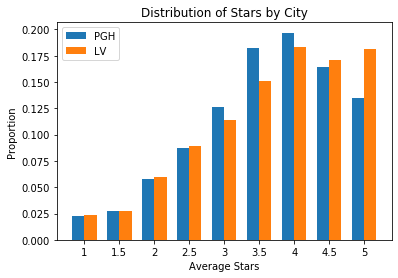

In [173]:
labels = ['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']
stars_pitt = pittsburgh.groupby('stars').size() / len(pittsburgh)
stars_vegas = las_vegas.groupby('stars').size() / len(las_vegas)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, stars_pitt, width, label='PGH')
rects2 = ax.bar(x + width/2, stars_vegas, width, label='LV')
ax.set_xticklabels(labels)
ax.set_xticks(x)
plt.xlabel('Average Stars')
plt.ylabel('Proportion')
plt.title('Distribution of Stars by City')
plt.legend()
plt.show()

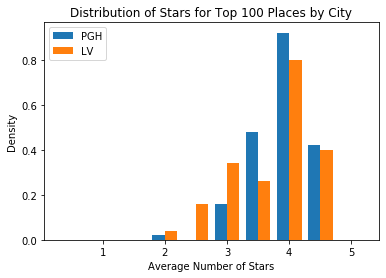

In [13]:
bins = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]
plt.hist([top_100_pgh['stars'], top_100_lv['stars']], bins = bins, label = ['PGH', 'LV'], density = True)
plt.legend(loc='upper left')
plt.xlabel('Average Number of Stars')
plt.ylabel('Density')
plt.title('Distribution of Stars for Top 100 Places by City')
plt.show()

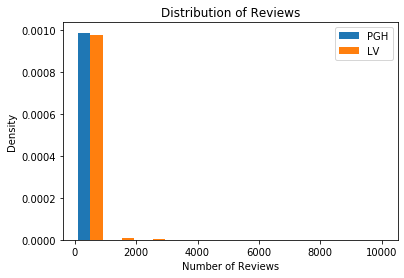

In [14]:
# DONT USE THIS IN FINAL REPORT
plt.hist([pittsburgh['review_count'], las_vegas['review_count']], density = True, label = ['PGH', 'LV'])
plt.legend(loc = 'upper right')
plt.xlabel('Number of Reviews')
plt.ylabel('Density')
plt.title('Distribution of Reviews')
plt.show()

## Reviews

In [15]:
reviews_pitt = read_json('reviews_pittsburgh.json')
reviews_pitt['date'] = pd.to_datetime(reviews_pitt['date'])
reviews_pitt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55560 entries, 0 to 55559
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    55560 non-null  object        
 1   user_id      55560 non-null  object        
 2   business_id  55560 non-null  object        
 3   stars        55560 non-null  float64       
 4   useful       55560 non-null  int64         
 5   funny        55560 non-null  int64         
 6   cool         55560 non-null  int64         
 7   text         55560 non-null  object        
 8   date         55560 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.8+ MB


In [16]:
reviews_pitt.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,VaGS1PvguQW-CdpjYUgs9Q,ZnNcaZ7tAIhvWzihCXjFSQ,oeW0vIYd3rUnAPgmD4fEFg,4.0,0,0,1,Surprised they didn't open earlier in a Sunday...,2017-03-27 01:31:04
1,ObO1y1Ffs6f3JtSSGA0rWQ,Hc2tC2TDMD1wDjp8aCq7jA,CK-Gv3vqIlWOrKP4fhT8_g,5.0,0,0,0,This is probably my favorite bar in Pittsburgh...,2010-01-08 14:20:01
2,-DQb3fBYScdqyi_9irsJtA,CWenIpiWVvcBJPXFR5A6OQ,oS96aJIHFWcFAlGHKKXjaw,5.0,5,2,3,So happy to have found a little piece of Franc...,2014-04-19 17:37:58
3,N-47CYWYryHK3T08dknlNQ,oRZQgGKZBG5V5ePmQkngww,TFdLM8R_7Pf1xVeBNKl0hg,5.0,0,0,0,"Pittsburgh has many excellent restaurants, and...",2017-03-15 13:43:13
4,zWbB11c4Ps6c2CZtKlweZg,OqweF5o8se1UcJ7YjBB7hQ,TFdLM8R_7Pf1xVeBNKl0hg,5.0,0,0,0,My introduction as a youth (dating back AWAYS)...,2015-03-18 18:59:33


In [17]:
reviews_lv = read_json('reviews_lv.json')
reviews_lv['date'] = pd.to_datetime(reviews_lv['date'])
reviews_lv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330662 entries, 0 to 330661
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    330662 non-null  object        
 1   user_id      330662 non-null  object        
 2   business_id  330662 non-null  object        
 3   stars        330662 non-null  float64       
 4   useful       330662 non-null  int64         
 5   funny        330662 non-null  int64         
 6   cool         330662 non-null  int64         
 7   text         330662 non-null  object        
 8   date         330662 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 22.7+ MB


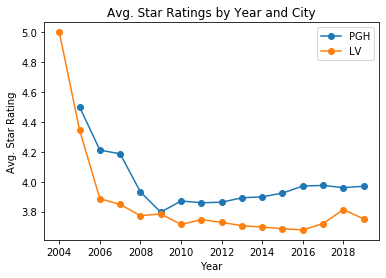

In [18]:
# Average stars by year
reviews_pitt.groupby(reviews_pitt.date.dt.year).stars.mean().plot(label = 'PGH', marker = 'o')
reviews_lv.groupby(reviews_lv.date.dt.year).stars.mean().plot(label = 'LV', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Avg. Star Rating')
plt.title('Avg. Star Ratings by Year and City')
plt.legend()
plt.show()

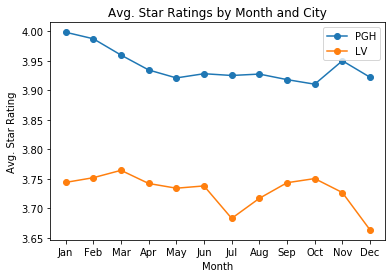

In [20]:
# Avg stars by month
reviews_pitt.groupby(reviews_pitt.date.dt.month).stars.mean().plot(label = 'PGH', marker = 'o')
reviews_lv.groupby(reviews_lv.date.dt.month).stars.mean().plot(label = 'LV', marker = 'o')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.xlabel('Month')
plt.ylabel('Avg. Star Rating')
plt.title('Avg. Star Ratings by Month and City')
plt.legend()
plt.show()

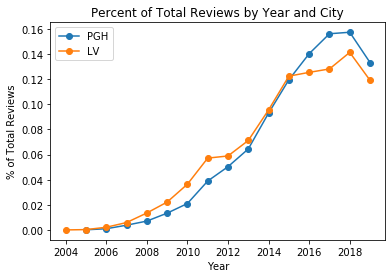

In [19]:
# Number of reviews by year
pitt_reviews_year = reviews_pitt.groupby(reviews_pitt.date.dt.year).size() / len(reviews_pitt)
lv_reviews_year = reviews_lv.groupby(reviews_lv.date.dt.year).size() / len(reviews_lv)

plt.plot(pitt_reviews_year, label = 'PGH', marker = 'o')
plt.plot(lv_reviews_year, label = 'LV', marker = 'o')
#plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Year')
plt.ylabel('% of Total Reviews')
plt.title('Percent of Total Reviews by Year and City')
plt.legend()
plt.show()

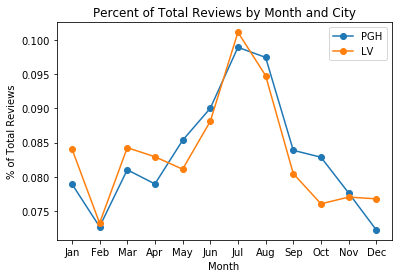

In [21]:
# Number of reviews by month
pitt_reviews_month = reviews_pitt.groupby(reviews_pitt.date.dt.month).size() / len(reviews_pitt)
lv_reviews_month = reviews_lv.groupby(reviews_lv.date.dt.month).size() / len(reviews_lv)

plt.plot(pitt_reviews_month, label = 'PGH', marker = 'o')
plt.plot(lv_reviews_month, label = 'LV', marker = 'o')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('% of Total Reviews')
plt.title('Percent of Total Reviews by Month and City')
plt.legend()
plt.show()

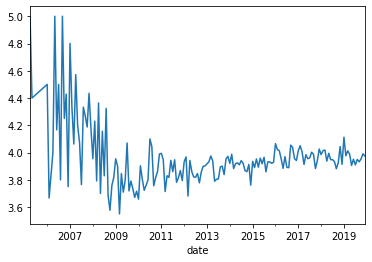

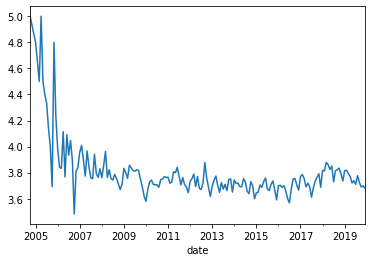

In [22]:
# Month + Year
# Maybe subset a given year?
monthly_pitt = reviews_pitt.date.dt.to_period("M")
reviews_pitt.groupby(monthly_pitt).stars.mean().plot()
plt.show()

monthly_lv = reviews_lv.date.dt.to_period("M")
reviews_lv.groupby(monthly_lv).stars.mean().plot()
plt.show()

# Don't show this, but basically the star ratings were a lot more volatile in the beginning

-0.14517449745789615


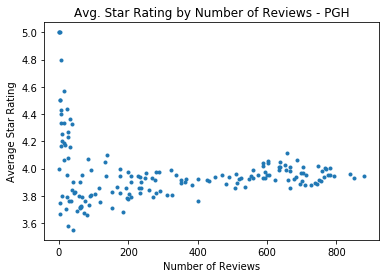

In [102]:
# Plot of avg. star ratings vs. number of reviews
# Reviews_pitt = reviews from the top 100 most reviewed places in Pittsburgh
num_reviews = reviews_pitt.groupby(reviews_pitt.date.dt.to_period("M")).size()
stars = reviews_pitt.groupby(reviews_pitt.date.dt.to_period("M")).stars.mean()
print(num_reviews.corr(stars)) # Including high outliers

plt.plot(num_reviews, stars, '.')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Star Rating')
plt.title('Avg. Star Rating by Number of Reviews - PGH')
plt.show()

-0.4176510929985461


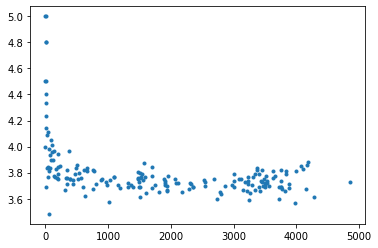

In [101]:
num_reviews = reviews_lv.groupby(reviews_lv.date.dt.to_period("M")).size()
stars = reviews_lv.groupby(reviews_lv.date.dt.to_period("M")).stars.mean()

print(num_reviews.corr(stars)) # Including high outliers
plt.plot(num_reviews, stars, '.')
plt.show()

### Word Cloud for Reviews

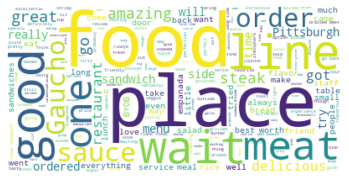

In [25]:
# wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Gaucho: second most reviews, has 4.5 stars
gaucho = " ".join(review for review in reviews_pitt[reviews_pitt.business_id == 'u4sTiCzVeIHZY8OlaL346Q'].text)
wordcloud_gaucho = WordCloud(max_words = 1000, background_color = 'white').generate(gaucho)

plt.imshow(wordcloud_gaucho, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
top_100_pgh[top_100_pgh.stars == 2]

# Reviews from Wyndham
# reviews_pitt[reviews_pitt.business_id == '8E8vEhkALOcFlheFAGOUXw']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1302,8E8vEhkALOcFlheFAGOUXw,Wyndham Grand Pittsburgh Downtown,600 Commonwealth Place,Pittsburgh,PA,15222,40.44163,-80.006241,2.0,396,1,"{'RestaurantsPriceRange2': '3', 'WiFi': 'u'fre...","Hotels & Travel, Hotels, Event Planning & Serv...",None


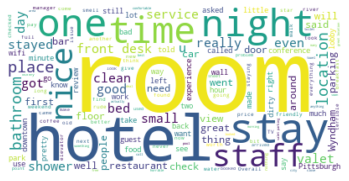

In [27]:
wyndham = " ".join(review for review in reviews_pitt[reviews_pitt.business_id == '8E8vEhkALOcFlheFAGOUXw'].text)
wordcloud_wyndham = WordCloud(max_words = 1000, background_color = 'white').generate(wyndham)

plt.imshow(wordcloud_wyndham, interpolation='bilinear')
plt.axis("off")
plt.show()

## Tips Dataset

In [28]:
tips_pitt = read_json('tips_pittsburgh.json')
tips_pitt['date'] = pd.to_datetime(tips_pitt['date'])
tips_pitt.info()

tips_lv = read_json('tips_lv.json')
tips_lv['date'] = pd.to_datetime(tips_lv['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           7002 non-null   object        
 1   business_id       7002 non-null   object        
 2   text              7002 non-null   object        
 3   date              7002 non-null   datetime64[ns]
 4   compliment_count  7002 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 273.6+ KB


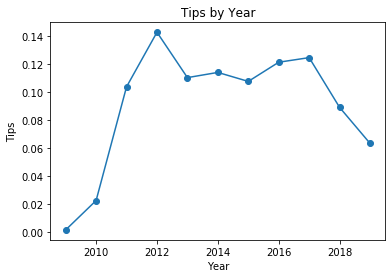

In [174]:
pitt_tips_year = tips_pitt.groupby(tips_pitt.date.dt.year).size() / len(tips_pitt)
lv_tips_year = tips_lv.groupby(tips_lv.date.dt.year).size() / len(tips_lv)

plt.plot(pitt_tips_year, label = 'PGH', marker = 'o')
plt.plot(lv_tips_year, label = 'LV', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Tips')
plt.title('Tips by Year')
plt.legend()
plt.show()

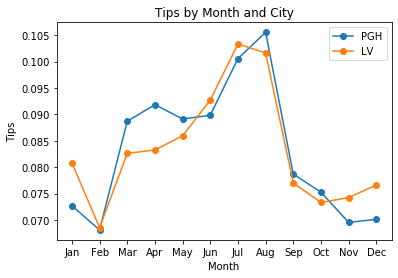

In [30]:
pitt_tips_month = tips_pitt.groupby(tips_pitt.date.dt.month).size() / len(tips_pitt)
lv_tips_month = tips_lv.groupby(tips_lv.date.dt.month).size() / len(tips_lv)

plt.plot(pitt_tips_month, label = 'PGH', marker = 'o')
plt.plot(lv_tips_month, label = 'LV', marker = 'o')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Tips')
plt.title('Tips by Month and City')
plt.legend()
plt.show()

nan


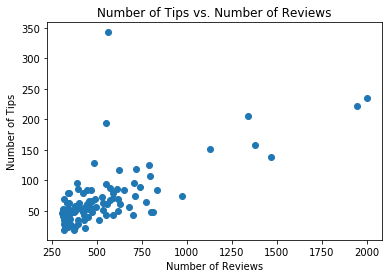

In [229]:
# Compare number of reviews and number of tips
top_100_pgh = pittsburgh.sort_values(by = 'review_count', ascending = False)[:100]
reviews = top_100_pgh.review_count

top_100_ids = top_100_pgh.business_id

tips_all = tips_pitt.groupby('business_id').size()
tips = hi.filter(items = list(top_100_ids))

plt.plot(reviews, tips, 'o')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Tips')
plt.title('Number of Tips vs. Number of Reviews')
plt.show()



123
0.3145539809319873


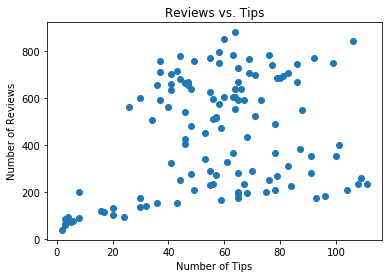

In [188]:
# Compare number of reviews and number of tips
num_tips = tips_pitt.groupby(tips_pitt.date.dt.to_period("M")).size()
num_reviews_recent = num_reviews[num_tips.index] # to match the length of num tips

print(num_tips.corr(num_reviews_recent))
plt.plot(num_tips, num_reviews_recent, 'o')
plt.xlabel('Number of Tips')
plt.ylabel('Number of Reviews')
plt.title('Reviews vs. Tips')
plt.show()

## Checkins Dataset

In [32]:
checkins_pitt = read_json('checkins_pittsburgh.json')
#checkins_pitt['date'] = pd.to_datetime(checkins_pitt['date'])
checkins_pitt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  100 non-null    object
 1   date         100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [37]:
checkins_pitt.head() # each row is a business id, dates = list of dates and times of all checkins

<class 'str'>


,business_id,date
0,-7H-oXvCxJzuT42ky6Db0g,"2012-04-06 20:40:03, 2012-04-06 21:27:47, 2012..."
1,0PCBt3JKD6IooicImKNBzA,"2012-12-31 18:54:32, 2013-01-09 16:34:46, 2013..."
2,0VUbtKyg-_2Y4T1ct2KUNQ,"2017-12-19 05:13:29, 2017-12-20 19:12:10, 2017..."
3,1RECFIhw6tdiP4l3smu6Kw,"2015-08-20 15:49:07, 2015-08-23 01:14:01, 2015..."
4,3GuqcEYaF1d1WXcwOX5xPw,"2010-01-31 15:53:52, 2010-02-07 20:10:45, 2010..."


In [92]:
checkin_dates = []
for date_list in checkins_pitt.date:
    date_list = date_list.split(',')
    for date in date_list:
        date = date.strip()
        checkin_dates.append(date)
        
checkin_dates_pd = pd.to_datetime(pd.Series(checkin_dates), format="%Y-%m-%d %H:%M:%S")

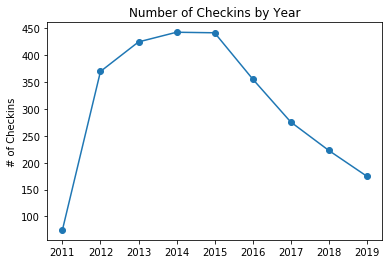

In [95]:
checkin_year = checkin_dates_pd.groupby(checkin_dates_pd.dt.year).size()

plt.plot(checkin_mp_year, marker = 'o')
plt.ylabel('# of Checkins')
plt.title('Number of Checkins by Year')
plt.show()

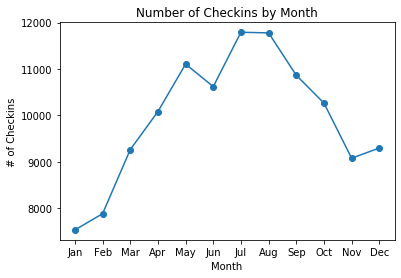

In [96]:
checkin_month = checkin_dates_pd.groupby(checkin_dates_pd.dt.month).size()

plt.plot(checkin_month, marker = 'o')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('# of Checkins')
plt.title('Number of Checkins by Month')
plt.show()

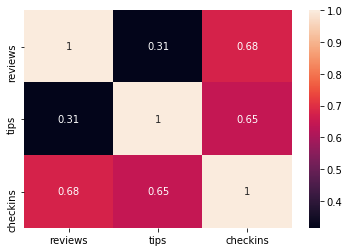

In [94]:
num_reviews = reviews_pitt.groupby(reviews_pitt.date.dt.to_period("M")).size()
num_tips = tips_pitt.groupby(tips_pitt.date.dt.to_period("M")).size()
num_checkins = checkin_dates_pd.groupby(checkin_dates_pd.dt.to_period("M")).size()

df = pd.DataFrame({'reviews':num_reviews,
                  'tips':num_tips, 
                  'checkins': num_checkins})
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

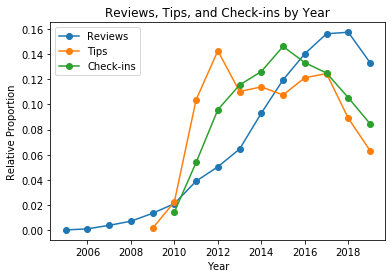

In [181]:
# Year
checkin_year = checkin_dates_pd.groupby(checkin_dates_pd.dt.year).size() / len(checkin_dates_pd)
tips_year = tips_pitt.groupby(tips_pitt.date.dt.year).size() / len(tips_pitt)
reviews_year = reviews_pitt.groupby(reviews_pitt.date.dt.year).size() / len(reviews_pitt)

plt.plot(reviews_year, label = 'Reviews', marker = 'o')
plt.plot(tips_year, label = 'Tips', marker = 'o')
plt.plot(checkin_year, label = 'Check-ins', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Relative Proportion')
plt.title('Reviews, Tips, and Check-ins by Year')
plt.legend()
plt.show()

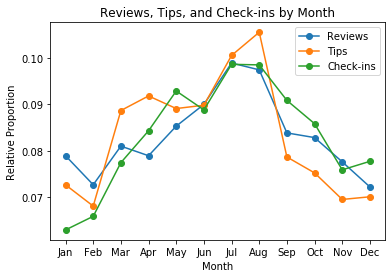

In [182]:
# Month
checkin_month = checkin_dates_pd.groupby(checkin_dates_pd.dt.month).size() / len(checkin_dates_pd)
tips_month = tips_pitt.groupby(tips_pitt.date.dt.month).size() / len(tips_pitt)
reviews_month = reviews_pitt.groupby(reviews_pitt.date.dt.month).size() / len(reviews_pitt)

plt.plot(reviews_month, label = 'Reviews', marker = 'o')
plt.plot(tips_month, label = 'Tips', marker = 'o')
plt.plot(checkin_month, label = 'Check-ins', marker = 'o')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Relative Proportion')
plt.title('Reviews, Tips, and Check-ins by Month')
plt.legend()
plt.show()

## Meat and Potatoes

In [ ]:
# How have stars, reviews, tips, checkins been over time?

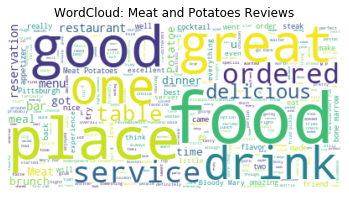

In [230]:
# Wordcloud: Reviews
meat_potatoes = " ".join(review for review in reviews_pitt[reviews_pitt.business_id == 'JLbgvGM4FXh9zNP4O5ZWjQ'].text)
wordcloud_meat_potatoes = WordCloud(max_words = 1000, background_color = 'white').generate(meat_potatoes)

plt.imshow(wordcloud_meat_potatoes, interpolation='bilinear')
plt.title('WordCloud: Meat and Potatoes Reviews')
plt.axis("off")
plt.show()

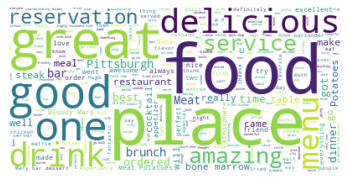

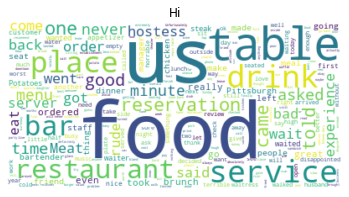

In [185]:
# Wordcloud: Reviews: 5-star reviews
meat_potatoes = " ".join(review for review in reviews_pitt[(reviews_pitt.business_id == 'JLbgvGM4FXh9zNP4O5ZWjQ') & (reviews_pitt.stars == 5)].text)
wordcloud_meat_potatoes = WordCloud(max_words = 1000, background_color = 'white').generate(meat_potatoes)

plt.imshow(wordcloud_meat_potatoes, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud: Reviews: 1-star reviews
meat_potatoes = " ".join(review for review in reviews_pitt[(reviews_pitt.business_id == 'JLbgvGM4FXh9zNP4O5ZWjQ') & (reviews_pitt.stars == 1)].text)
wordcloud_meat_potatoes = WordCloud(max_words = 1000, background_color = 'white').generate(meat_potatoes)

plt.imshow(wordcloud_meat_potatoes, interpolation='bilinear')
plt.title('Hi')
plt.axis("off")
plt.show()

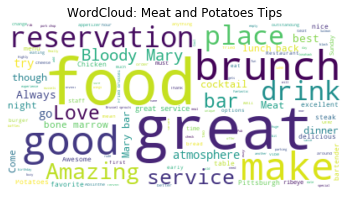

In [231]:
# Wordcloud: Tips
meat_potatoes = " ".join(tip for tip in tips_pitt[tips_pitt.business_id == 'JLbgvGM4FXh9zNP4O5ZWjQ'].text)
wordcloud_meat_potatoes = WordCloud(max_words = 1000, background_color = 'white').generate(meat_potatoes)

plt.imshow(wordcloud_meat_potatoes, interpolation='bilinear')
plt.title('WordCloud: Meat and Potatoes Tips')
plt.axis("off")
plt.show()

In [ ]:
# Find dates of all checkins at meat and potatoes
checkins_pitt[checkins_pitt.business_id == 'JLbgvGM4FXh9zNP4O5ZWjQ'].index

checkin_list = checkins_pitt.date[20].split(',')
checkin_mp_dates = []
for date in checkin_list: 
    date = date.strip()
    
checkin_mp_pd = pd.to_datetime(pd.Series(checkin_list), format="%Y-%m-%d %H:%M:%S")
print(checkin_mp_pd[0])

In [98]:
checkin_mp_month = checkin_mp_pd.groupby(checkin_mp_pd.dt.month).size() / len(checkin_mp_pd)
(tips_mp_month = tips_pitt[tips_pitt.business_id == 'JLbgvGM4FXh9zNP4O5ZWjQ'].groupby(tips_pitt.date.dt.month).size() / len(tips_pitt[tips_pitt.business_id == 'JLbgvGM4FXh9zNP4O5ZWjQ'])

plt.plot(checkin_mp_month, marker = 'o', label = 'check in')
plt.plot(tips_mp_month, marker = 'o', label = 'tips')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Relative Proportion')
plt.legend()
plt.title('% Checkins, Tips, and Reviews by Month for Meat and Potatoes')
plt.show()

SyntaxError: invalid syntax (<ipython-input-98-d3adb697b1d9>, line 2)

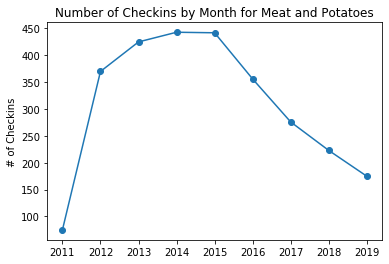

In [74]:
checkin_mp_year = checkin_mp_pd.groupby(checkin_mp_pd.dt.year).size()

plt.plot(checkin_mp_year, marker = 'o')
plt.ylabel('# of Checkins')
plt.title('Number of Checkins by Year for Meat and Potatoes')
plt.show()

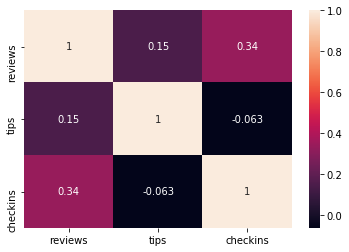

In [85]:
# Correlation between the number of checkins, reviews, and tips for Meat and Potatoes
num_checkins_mp = checkin_mp_pd.groupby(checkin_mp_pd.dt.to_period("M")).size()
num_reviews_mp = reviews_pitt[reviews_pitt.business_id == 'JLbgvGM4FXh9zNP4O5ZWjQ'].groupby(reviews_pitt.date.dt.to_period("M")).size()
num_tips_mp = tips_pitt[tips_pitt.business_id == 'JLbgvGM4FXh9zNP4O5ZWjQ'].groupby(reviews_pitt.date.dt.to_period("M")).size()

df = pd.DataFrame({'reviews':num_reviews_mp,
                  'tips':num_tips_mp, 
                  'checkins':num_checkins_mp})
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Univariate Data

In [151]:
businesses = read_json('yelp_academic_dataset_business.json')
print(businesses.shape)

(209393, 14)


is_open
0     40490
1    168903
dtype: int64


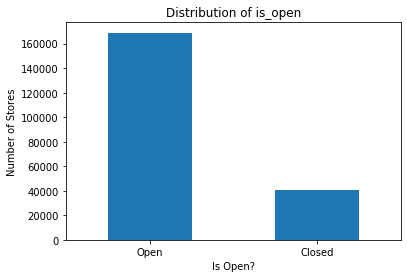

In [152]:
print(businesses.groupby('is_open').size())

is_open = pd.DataFrame({'lab':['Open', 'Closed'], 'val':[168903, 40490]})
ax = is_open.plot.bar(x='lab', y='val', rot=0)
ax.get_legend().remove()
plt.xlabel('Is Open?')
plt.ylabel('Number of Stores')
plt.title('Distribution of is_open')
plt.show()

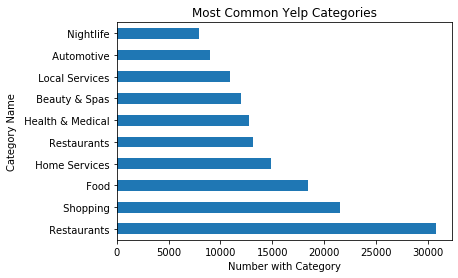

In [150]:
# Filter for places that are open, is_open = 1
businesses = businesses[businesses.is_open == 1]
# Filter out places that don't have any category
businesses = businesses.dropna(subset = ['categories'])

categories = {}
for array in businesses.categories.values:
    cat_array = array.split(',')
    for x in cat_array:
        try :
            categories[x] = categories[x] + 1
        except:
            categories[x] = 1
            
categories_dict = dict(Counter(categories).most_common(10))
df = pd.DataFrame({'lab': list(categories_dict.keys()), 'val': list(categories_dict.values())})
#print(df)
ax = df.plot.barh(x='lab', y='val') # This is a bit off color?
ax.get_legend().remove()
plt.xlabel('Number with Category')
plt.ylabel('Category Name')
plt.title('Most Common Yelp Categories')
plt.show()

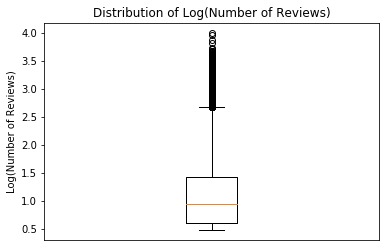

count    209393.000000
mean         36.937505
std         123.343597
min           3.000000
25%           4.000000
50%           9.000000
75%          27.000000
max       10129.000000
Name: review_count, dtype: float64

In [154]:
# Log'd because of the HUGE skew
ax = plt.boxplot(np.log10(businesses.review_count))
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.ylabel('Log(Number of Reviews)')
plt.title('Distribution of Log(Number of Reviews)')
plt.show()

businesses.review_count.describe()

In [122]:
print(businesses.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


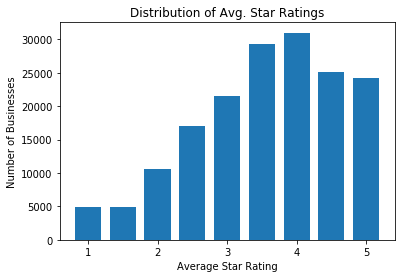

In [149]:
bins = [0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]
plt.hist(businesses['stars'], bins = bins, rwidth=0.75)
plt.xlabel('Average Star Rating')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Avg. Star Ratings')
plt.show()